In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pylab as plt

from pyinverse.axis import RegularAxis
from pyinverse.grid import RegularGrid
from pyinverse.ellipse import Ellipse, ellipse_proj_ft
from pyinverse.fbp import ramp_filter, BackProjector, fbp

In [3]:
Nx = 128
Ny = 128

In [4]:
axis_x = RegularAxis.linspace(-3, 3, Nx)
axis_y = RegularAxis.linspace(-3, 3, Ny)

In [5]:
Na = 201
Np = 1001

In [6]:
axis_t = RegularAxis.linspace(-3, 3, Np)
axis_theta = RegularAxis.linspace(0, 180, Na, endpoint=False)

In [7]:
grid = RegularGrid(axis_x, axis_y)
grid_y = RegularGrid(axis_theta, axis_t)

In [8]:
disk = Ellipse(1, 1, 1, 0, 0, 0)

In [9]:
sinogram = disk.sinogram(grid_y)

In [10]:
sinogram.shape

(1001, 201)

<IPython.core.display.Javascript object>


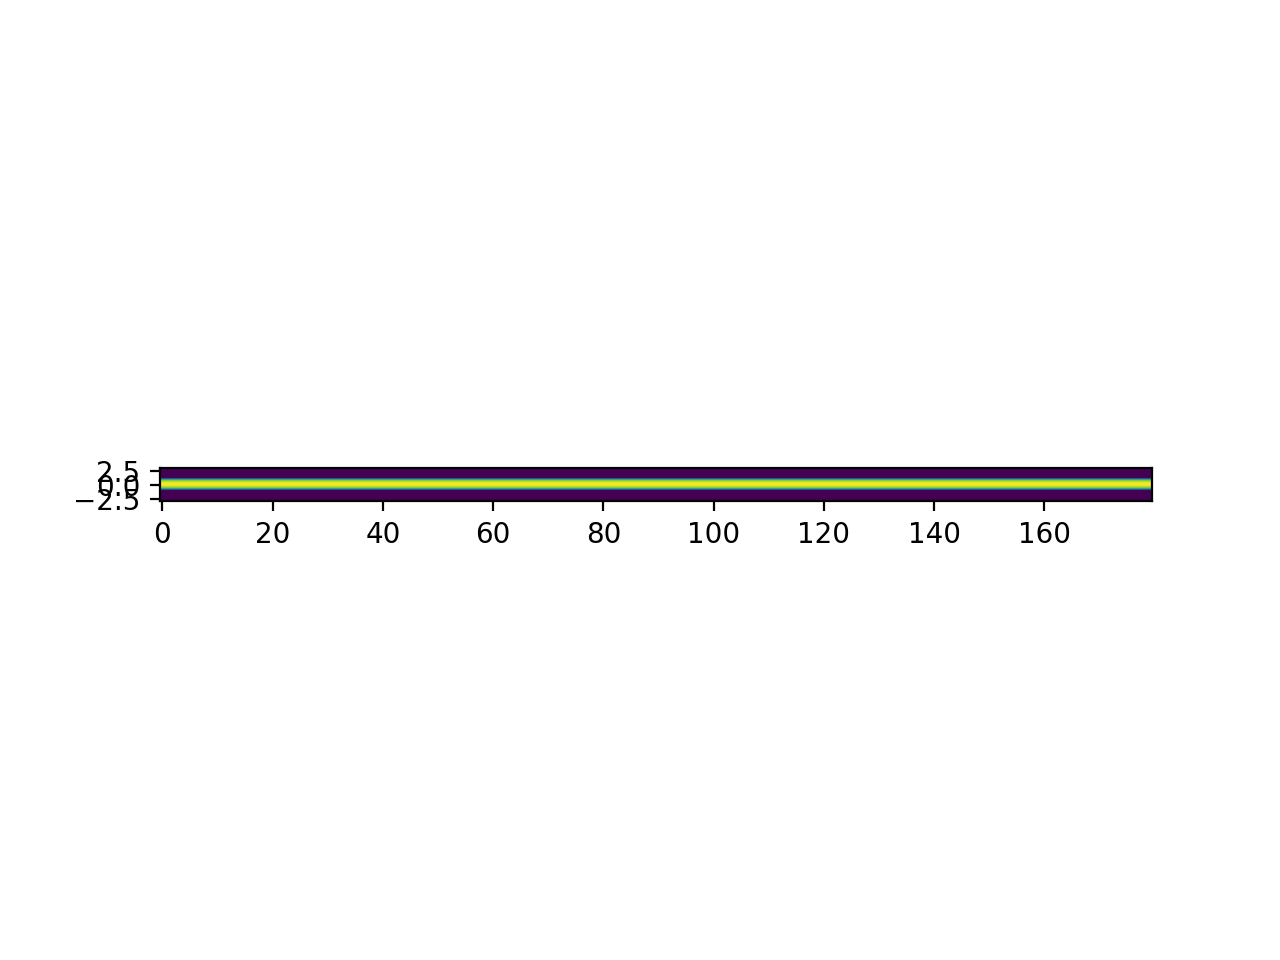

In [11]:
fig, ax = plt.subplots()
grid_y.plot(ax, sinogram);

In [12]:
proj_disk_epstein = np.zeros(Np)
T = np.abs(axis_t.centers) <= 1
proj_disk_epstein[T] = 2*np.sqrt(1 - axis_t.centers[T]**2)

<IPython.core.display.Javascript object>


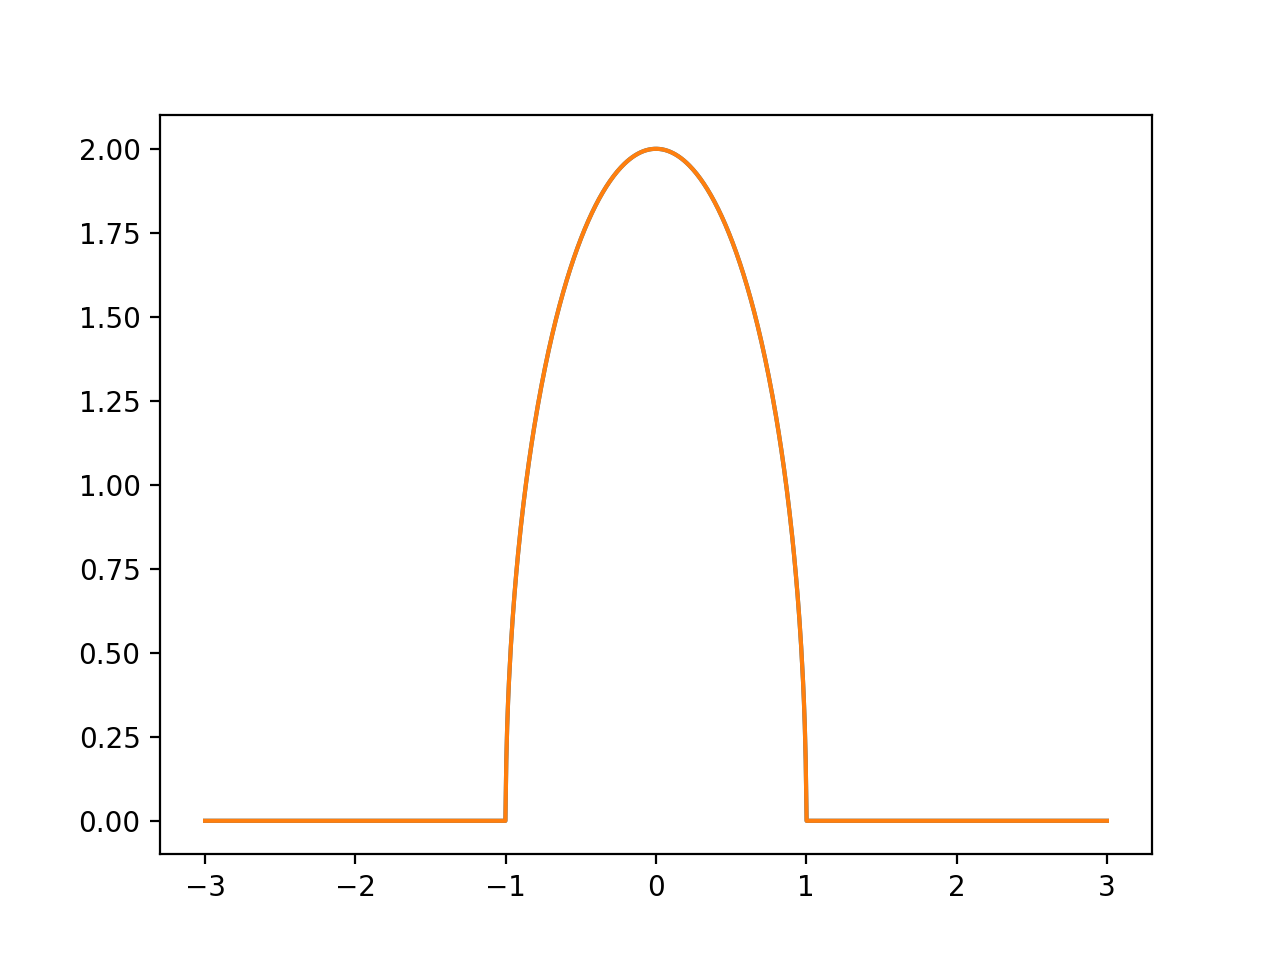

In [13]:
fig, ax = plt.subplots()
plt.plot(axis_t.centers, sinogram[:, 0])
plt.plot(axis_t.centers, proj_disk_epstein);

In [14]:
proj_disk_epstein_ramp = np.zeros(Np)
T1 = np.abs(axis_t.centers) >= 1
T2 = np.abs(axis_t.centers) < 1
proj_disk_epstein_ramp[T1] = 2 - 2*np.abs(axis_t.centers[T1]) / np.sqrt(axis_t.centers[T1]**2 - 1)
proj_disk_epstein_ramp[T2] = 2

<IPython.core.display.Javascript object>


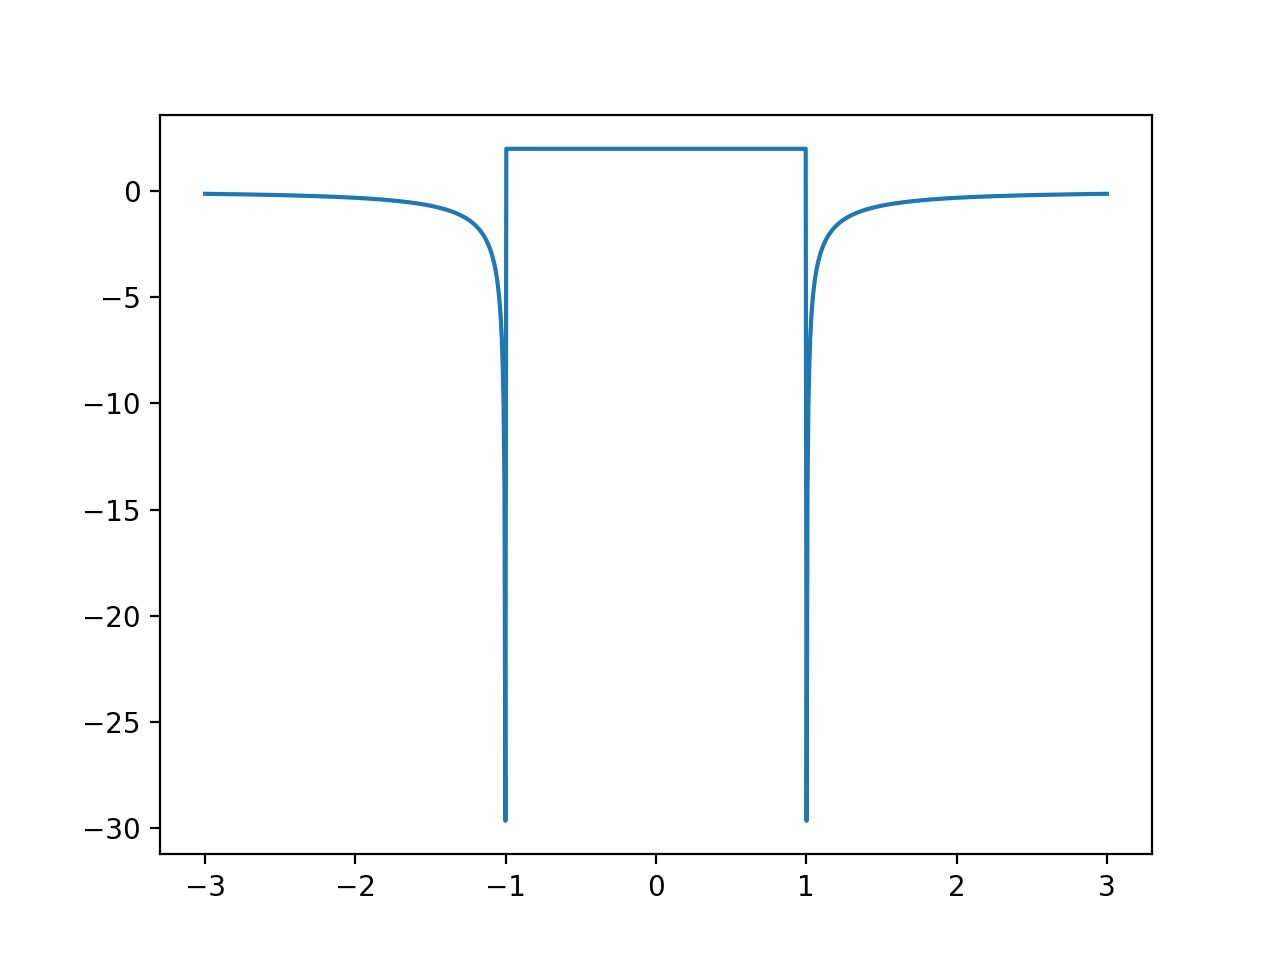

In [15]:
fig, ax = plt.subplots()
plt.plot(axis_t.centers, proj_disk_epstein_ramp);

In [16]:
axis_omega, F_sinogram = axis_t.spectrum(sinogram[:, 0], real=True)

In [17]:
grid_F_y = grid_y.spectrum_grid(axis=0, real=True)
F_disk = ellipse_proj_ft(disk, grid_F_y.Hz())
F_disk.shape

(501, 201)

In [18]:
grid_F_y.axis_y

<RFFTRegularAxis x0=0 T=1.0461513997968008 N=501>

In [19]:
axis_omega

<RFFTRegularAxis x0=0 T=1.0461513997968008 N=501>

<IPython.core.display.Javascript object>


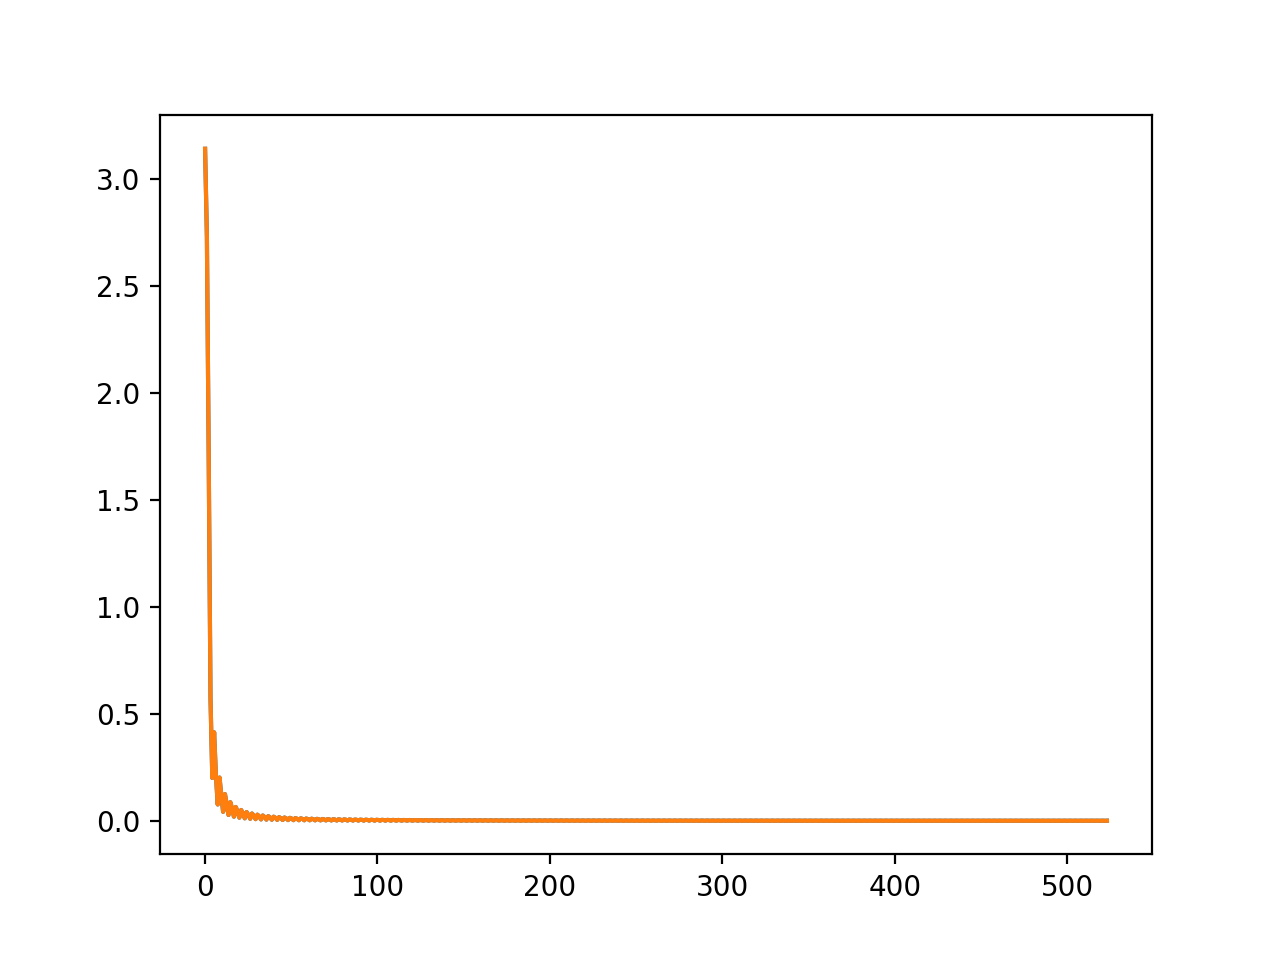

In [20]:
fig, ax = plt.subplots()
plt.plot(axis_omega.centers, np.abs(F_sinogram))
plt.plot(grid_F_y.axis_y.centers, np.abs(F_disk[:, 0]))

In [21]:
#ramp = ramp_filter(axis_omega)
ramp = axis_omega.centers

<IPython.core.display.Javascript object>


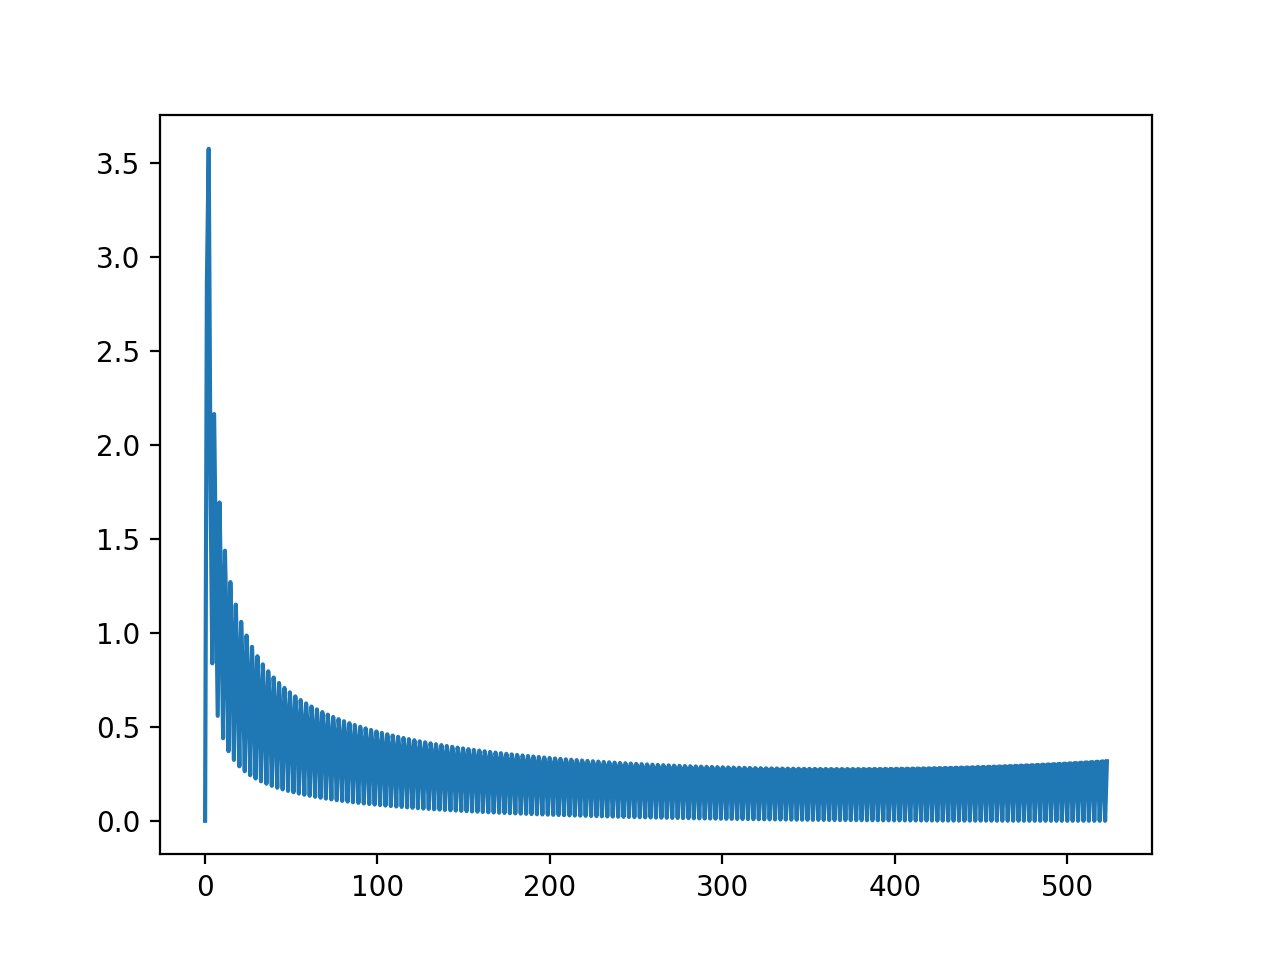

In [22]:
fig, ax = plt.subplots()
plt.plot(axis_omega.centers, np.abs(ramp * F_sinogram))

In [23]:
_, proj_disk_ramp = axis_omega.ispectrum(ramp * F_sinogram)

<IPython.core.display.Javascript object>


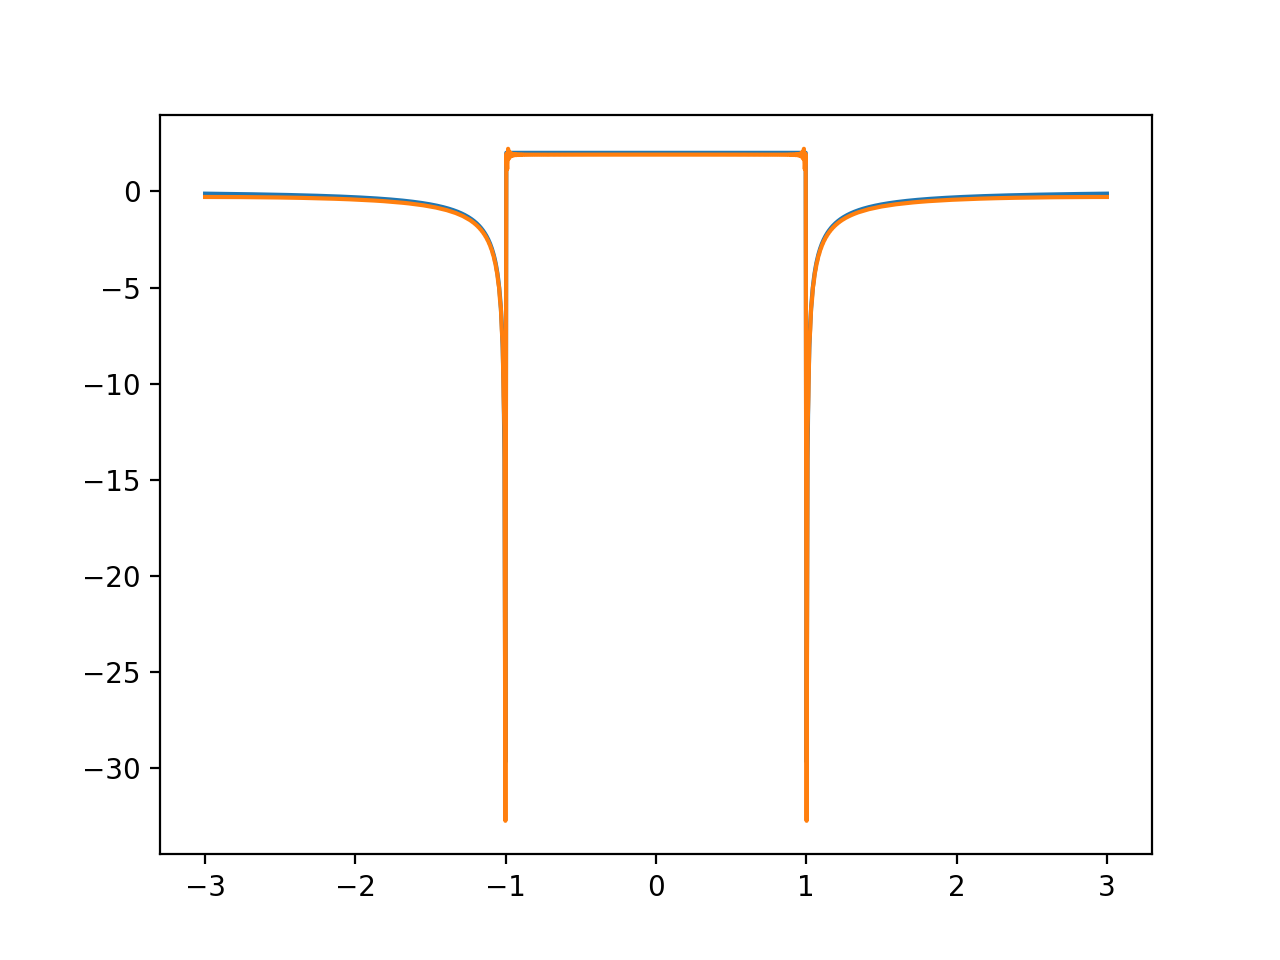

In [24]:
fig, ax = plt.subplots()
plt.plot(axis_t.centers, proj_disk_epstein_ramp)
plt.plot(axis_t.centers, proj_disk_ramp);

In [25]:
#bp = BackProjector(grid, grid_y, a=1/grid_y.axis_y.T)
bp = BackProjector(grid, grid_y)

100%|██████████████████████████████████████████████████████████| 16384/16384 [01:13<00:00, 222.90it/s]


In [26]:
Y_epstein_ramp = np.tile(np.atleast_2d(proj_disk_epstein_ramp).T, (1, Na))
Y_epstein_ramp.shape

(1001, 201)

In [27]:
Y_epstein = np.tile(np.atleast_2d(proj_disk_epstein).T, (1, Na))
Y_epstein.shape

(1001, 201)

In [28]:
grid_y.shape

(1001, 201)

In [29]:
disk_recon_epstein = (bp @ Y_epstein_ramp.flat) * np.radians(axis_theta.T) / (2*np.pi)
disk_recon_epstein.shape = grid.shape

<IPython.core.display.Javascript object>


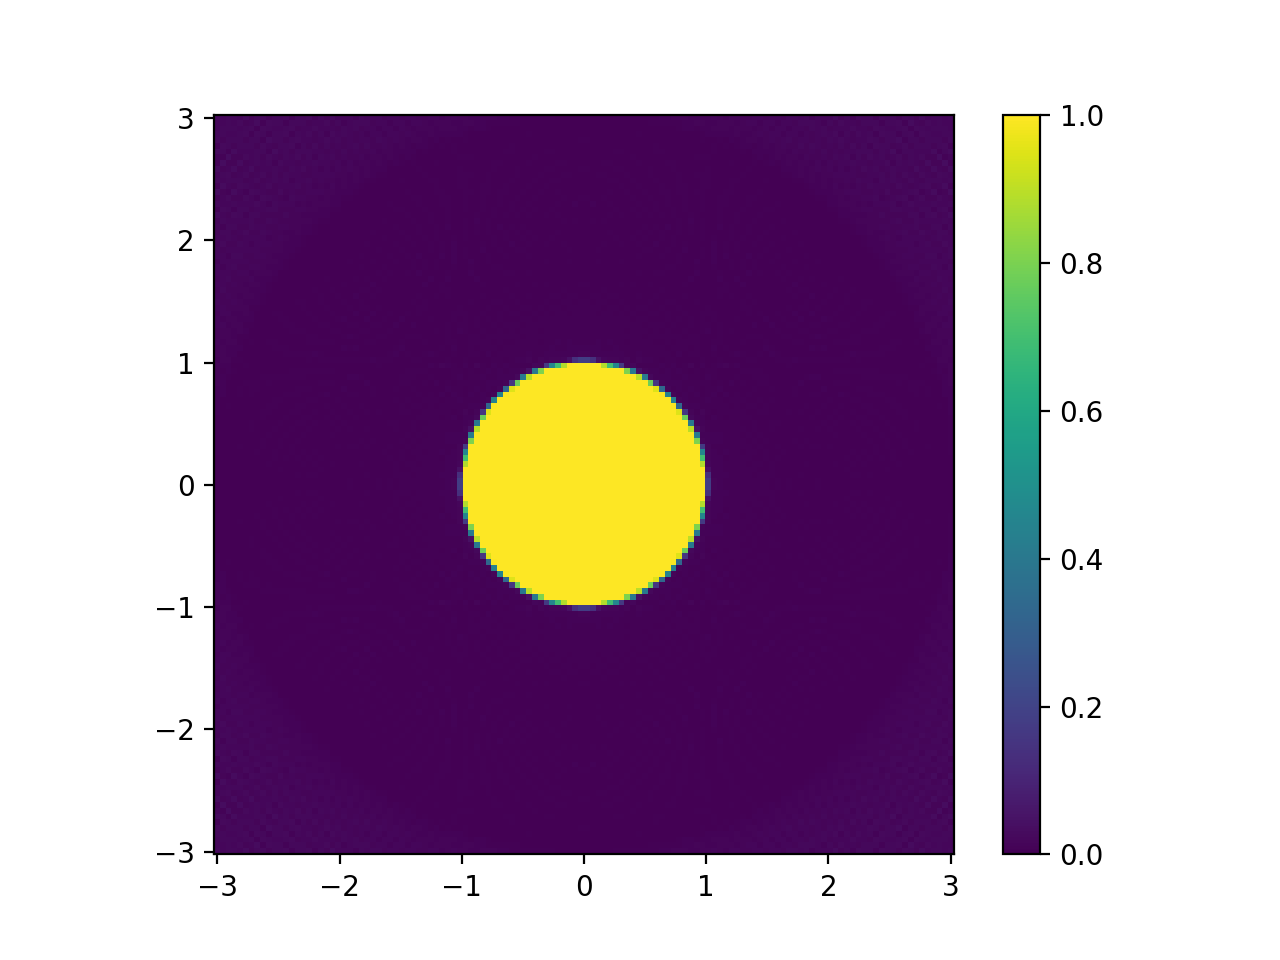

In [30]:
fig, ax = plt.subplots()
im = grid.plot(ax, disk_recon_epstein, vmin=0, vmax=1)
fig.colorbar(im, ax=ax);

In [31]:
disk_recon_epstein_fbp = fbp(grid, grid_y, Y_epstein, radon_matrix=bp.radon_matrix)

<IPython.core.display.Javascript object>


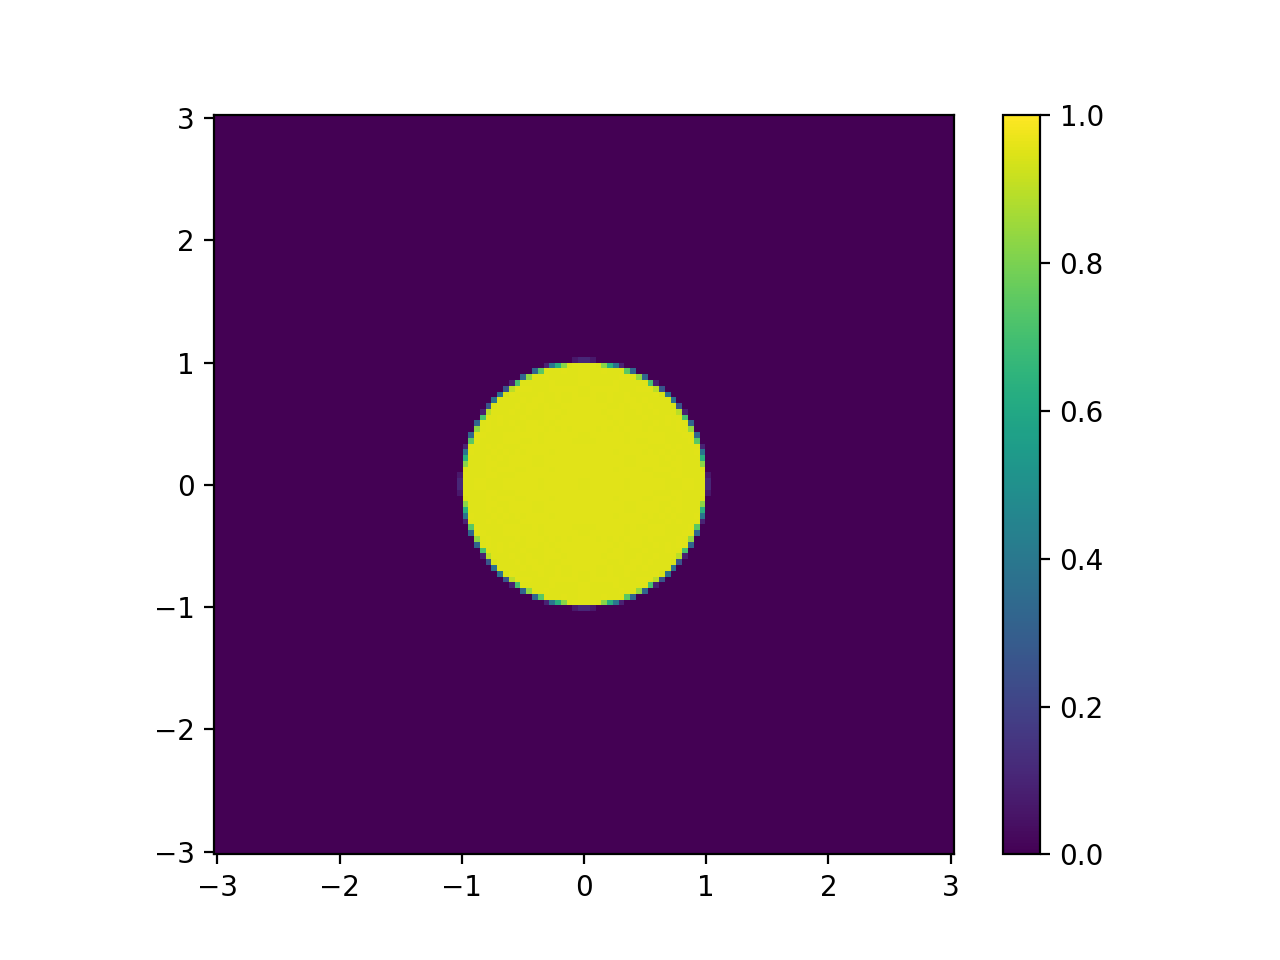

In [32]:
fig, ax = plt.subplots()
im = grid.plot(ax, disk_recon_epstein_fbp, vmin=0, vmax=1)
fig.colorbar(im, ax=ax);

In [33]:
disk_recon = fbp(grid, grid_y, sinogram, radon_matrix=bp.radon_matrix)

<IPython.core.display.Javascript object>


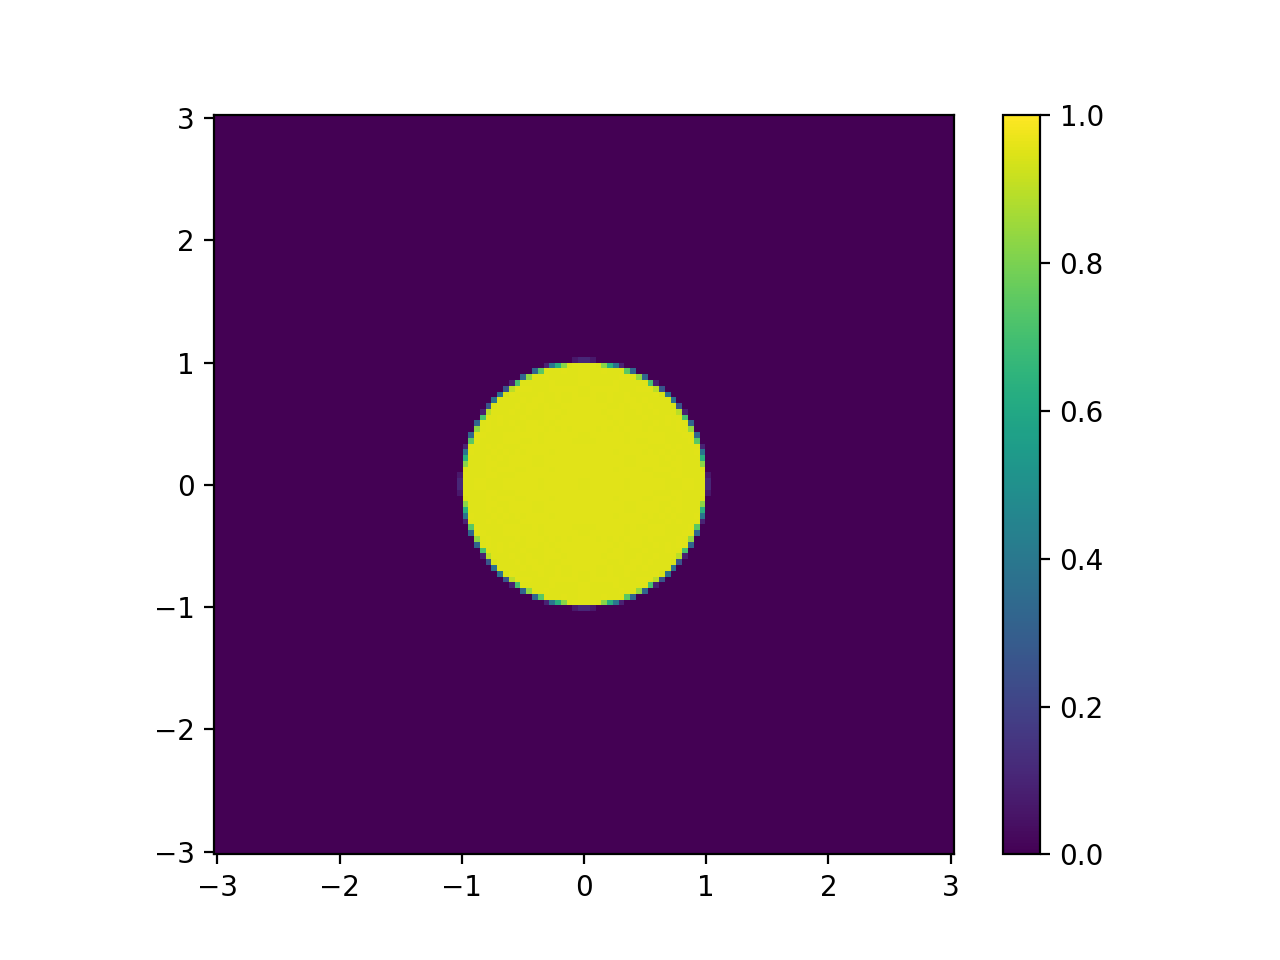

In [34]:
fig, ax = plt.subplots()
im = grid.plot(ax, disk_recon, vmin=0, vmax=1)
fig.colorbar(im, ax=ax);

In [35]:
disk_recon_interp = fbp(grid, grid_y, sinogram)

<IPython.core.display.Javascript object>


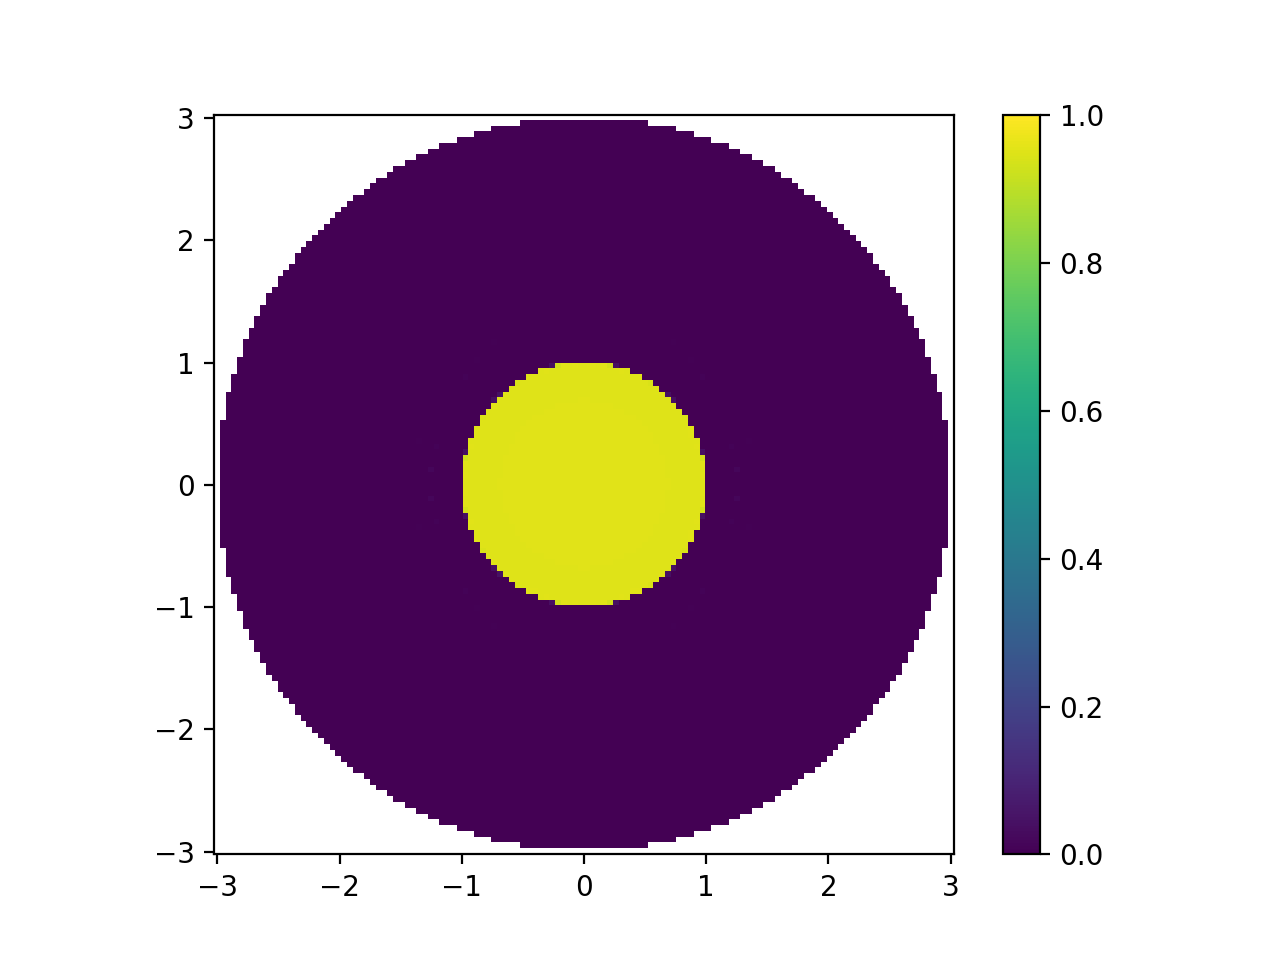

In [36]:
fig, ax = plt.subplots()
im = grid.plot(ax, disk_recon_interp, vmin=0, vmax=1)
fig.colorbar(im, ax=ax);